# Simple Linear Regression

In [ ]:
# Ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Estimate the profit of a startup based on RND

STEP 1 - Data Ingestion

In [ ]:
import pandas as pd 
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


STEP 2 - Perform basic data quality checks

In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# Check missing values in dataframe
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [ ]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

# Visualize the data

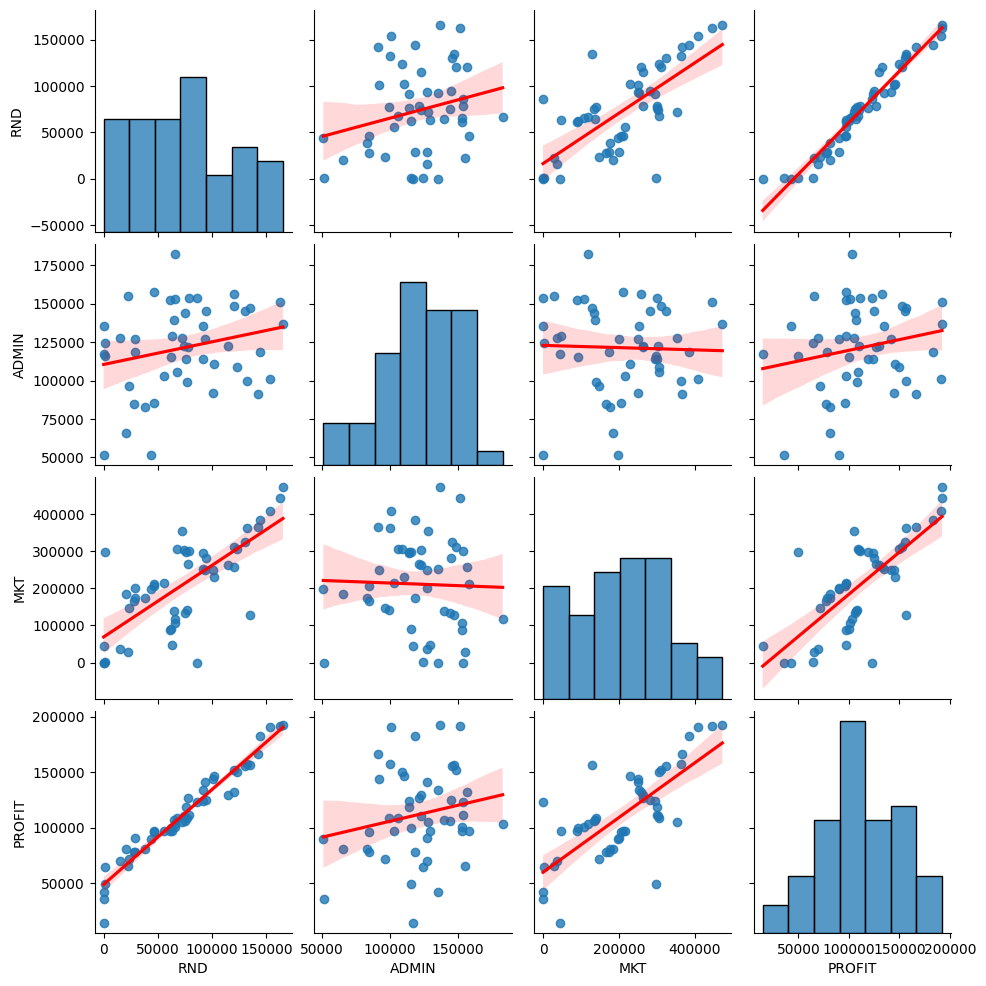

In [ ]:
import seaborn as sns
sns.pairplot(df,kind="reg",plot_kws={"line_kws":{"color":"red"}})

In [ ]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

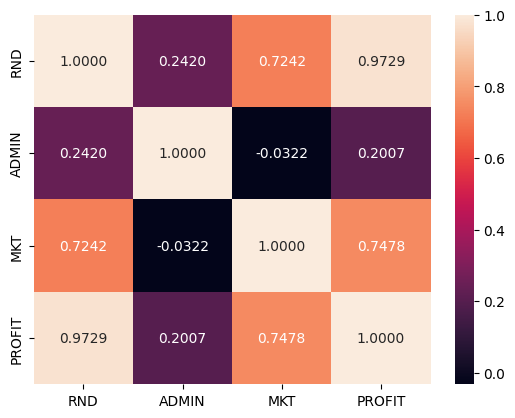

In [ ]:
sns.heatmap(corr,annot=True,fmt=".4f")

STEP 3 - Seperate X and Y (PROFIT)

In [ ]:
X = df[["RND"]] # make use of [[]] dataframe
Y = df["PROFIT"]

In [ ]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [ ]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

STEP 4 - Model Traing ->Fit the straight line 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
model.intercept_

np.float64(49032.89914125215)

In [ ]:
model.coef_

array([0.85429137])

# Visualize straight line 

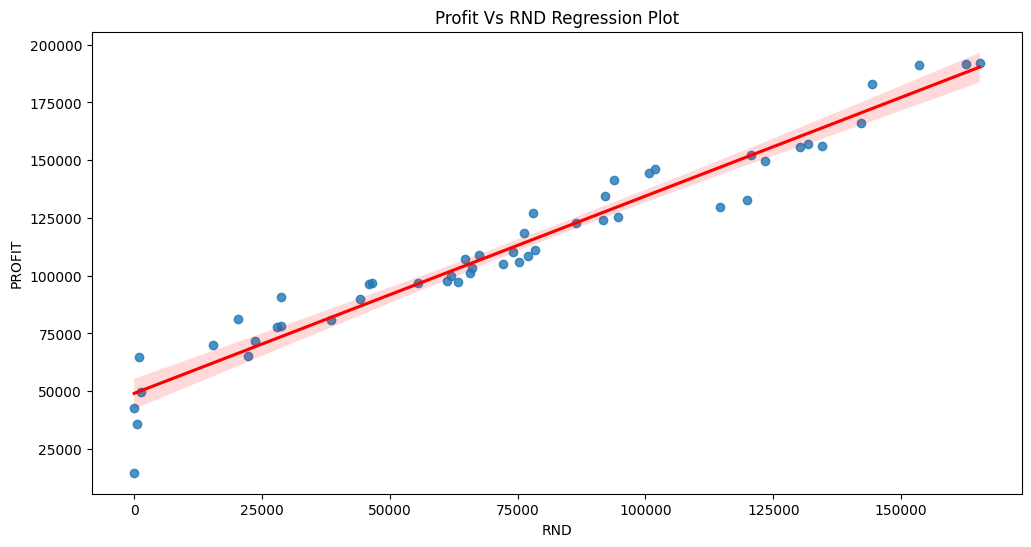

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.regplot(data=df, x="RND", y="PROFIT", line_kws = {"color": "red"})
plt.title("Profit Vs RND Regression Plot")
plt.show()

STEP 5 - Evaluate model

1.RMSE- Root Mean Squared Error

2.MAE- Mean Absolute Error

3.MAPE- Mean Absolute Percentage Error 

4.R2 - R2 Score

In [ ]:
ypred = model.predict(X)
ypred[0:5]

array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [ ]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [ ]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [ ]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


STEP 6 - Out of sample prediction

In [ ]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [ ]:
rnd = [[120000]]
profit = model.predict(rnd)
print(profit)

[151547.86365391]


In [ ]:
rnd = [[50000]]
profit = model.predict(rnd)
print(profit)

[91747.46768819]


In [ ]:
rnd = [
    [20000],
    [30000],
    [40000],
    [100000]
]
profits = model.predict(rnd)
print(profits)

[ 66118.72656003  74661.64026942  83204.5539788  134462.03623513]
